In [4]:
import pandas as pd
invoicedf = pd.read_csv('fct_invoice.csv')
customerdf = pd.read_json('dim_customer.json')


In [5]:
invoicedf

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [6]:
customerdf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [12]:
unique_customer_count = customerdf['id'].nunique()
unique_customer_count

5191

In [15]:
unique_category_count = invoicedf['category'].nunique()
unique_category = invoicedf['category'].unique()
unique_category, unique_category_count

(array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
        'Toys', 'Technology', 'Souvenir'], dtype=object),
 8)

In [18]:
payment_method = invoicedf['payment_method'].value_counts()
payment_method

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [31]:
invoicedf['sales'] = invoicedf['quantity'] * invoicedf['price']
category_sales = invoicedf.groupby('category')['sales'].sum()
x = category_sales.nlargest(3)
x

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

In [34]:
customers_over_45 = customerdf[customerdf['age'] > 45]
customers_over_45



,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
6,83.0,George,M,6,Ramirez
10,80.0,Abigail,F,10,Nelson
...,...,...,...,...,...
5181,84.0,Bryan,M,8888,Davis
5182,48.0,Chad,M,8889,Hooper
5184,46.0,Lisa,F,9150,Reed
5185,69.0,Deborah,F,9344,Delgado


In [36]:
mergeddf = pd.merge(customerdf, invoicedf, left_on='id', right_on = 'customer_id')
mergeddf

,age,first_name,gender,id,last_name,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,48.0,Nicholas,M,0,Flores,I254078,0,Shoes,3,1800.51,Cash,28/05/2021,Kanyon,5401.53
1,48.0,Nicholas,M,0,Flores,I387354,0,Shoes,1,600.17,Cash,7/4/2021,Kanyon,600.17
2,48.0,Nicholas,M,0,Flores,I170558,0,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM,162.64
3,48.0,Nicholas,M,0,Flores,I187874,0,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul,242.40
4,48.0,Nicholas,M,0,Flores,I171870,0,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park,322.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,9428,Cosmetics,5,203.30,Debit Card,4/7/2021,Mall of Istanbul,1016.50
99453,NaN,David,M,9494,Roy,I203211,9494,Cosmetics,1,40.66,Debit Card,9/7/2022,Metrocity,40.66
99454,85.0,Thomas,M,10350,Turner,I325731,10350,Cosmetics,2,81.32,Cash,7/4/2021,Cevahir AVM,162.64
99455,NaN,April,F,10587,Sanchez,I478078,10587,Clothing,5,1500.40,Credit Card,20/10/2022,Metrocity,7502.00


In [38]:
customers_over_45 = mergeddf[mergeddf['age'] > 45]
sum_45 = customers_over_45['sales'].sum()
sum_45

82039768.14999999

<Axes: xlabel='invoice_date'>

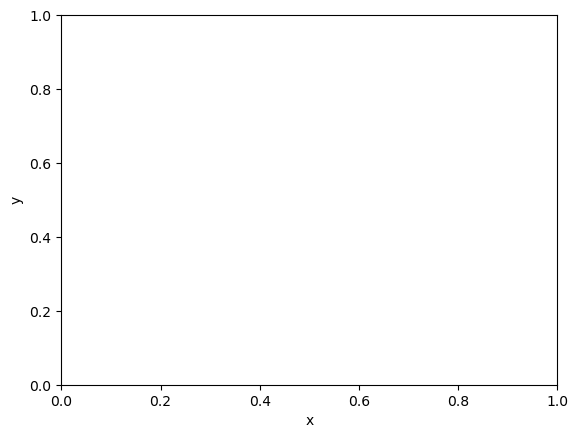

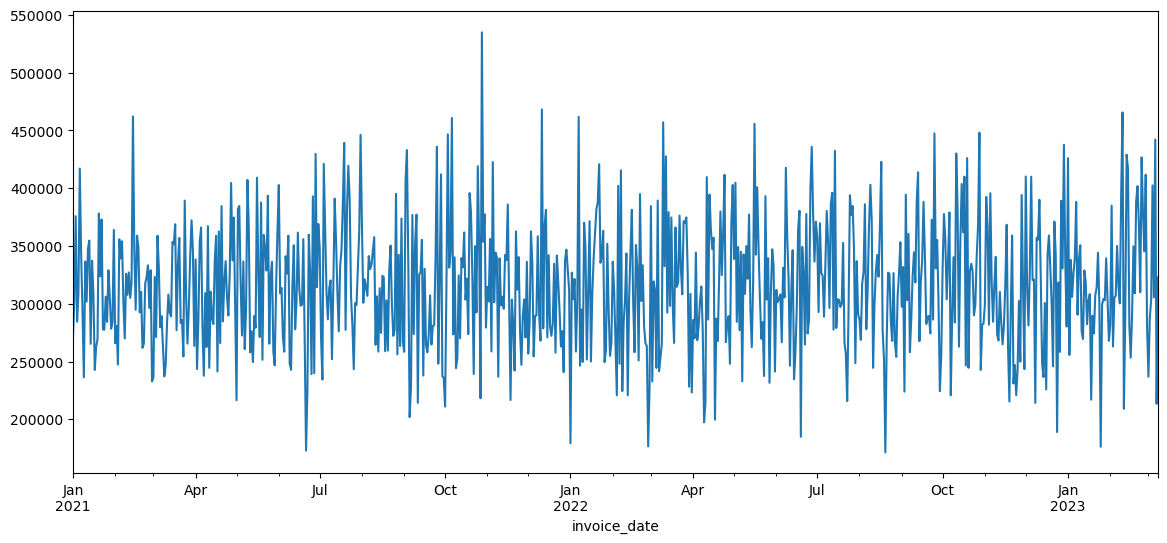

In [44]:
import matplotlib
import matplotlib.pyplot as plt

invoicedf['invoice_date'] = pd.to_datetime(invoicedf['invoice_date'],dayfirst = True)
invoicedf['sales'] = invoicedf['quantity'] * invoicedf['price']
date = invoicedf['invoice_date']
total_sales = invoicedf.groupby('invoice_date')['sales'].sum()

x = date
y = total_sales

plt.xlabel("x")
plt.ylabel("y")

plt.figure(figsize = (14,6))
total_sales.plot()

In [46]:

mergeddf['age_group'] = (mergeddf['age'] // 10*10)

pivot_table = pd.pivot_table(mergeddf, values = 'sales', index = 'age_group', columns = 'category', aggfunc = 'sum')

pivot_table


category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_group,,,,,,,,
10.0,12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
20.0,79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
30.0,84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
40.0,87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
50.0,74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
60.0,80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
70.0,54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
80.0,26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80
